### Generate the train and labels

In [5]:
!pip install opencv-python

     |████████████████████████████████| 26.6MB 3.5MB/s 


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cv2
from PIL import Image
import numpy as np
import os
from numpy import asarray

In [12]:
# image_path = "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Train_3bands_Swir1NIRSwir2.png"
# image_path = "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Train_3bands_NIRSwir1Swir2.png"
# image_path = "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Train_3bands_Swir2Swir1Swir2.png"
# image_path = "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Train_3bands_RGB.png"
# image_path = "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Train_3bands_234RGB.png"
image_path = "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Train_3bands_NIRGB.png"

label_path =  "/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Label_withinPoly.png"

In [13]:
img = Image.open(image_path)
labels = Image.open(label_path)
# label = labels.split()
# label = label[0]

In [14]:
img.size

(3839, 4933)

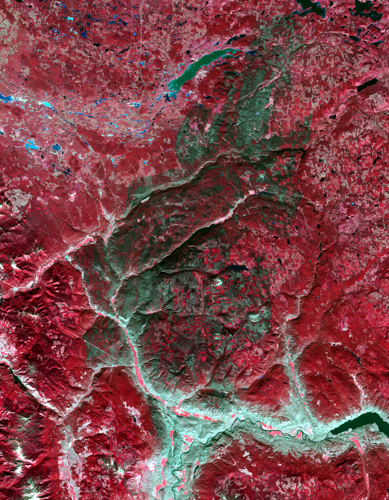

In [8]:
img.thumbnail((500,500))
img

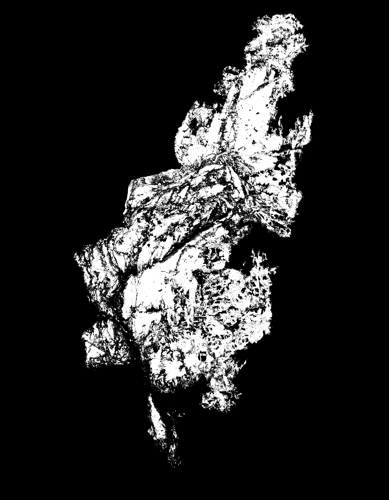

In [9]:
labels.thumbnail((500,500))
labels

## Generate the train image

In [16]:
# https://github.com/matterport/Mask_RCNN/issues/230
# imgFile: the train image path
# maskFile: the lable mask path
def randomCrop(imgFile, maskFile, width, height, num, randomSZ = False, bias = 20):
    
    img = Image.open(imgFile)
    mask = Image.open(maskFile)
    
    assert img.size[0] == mask.size[0]
    assert img.size[1] == mask.size[1]
    assert img.size[1] >= height
    assert img.size[0] >= width
    
    for i in range(num):
        
        width_2 = width
        height_2 = height
        
        x = np.random.randint(width, img.size[0] - width)
        y = np.random.randint(height, img.size[1] - height)

        box = (x-width_2/2, y-height_2/2,x+width_2/2, y+height_2/2, )

        yield img.crop(box), mask.crop(box), width_2, height_2

## Generate images and labels

In [44]:
height= 300
width = 300
start_num= 750

for k,  crop_img in enumerate(randomCrop(image_path,label_path, width,height, 150),start_num):
    
    image = crop_img[0]
    mask = crop_img[1]
    
    width_1, height_1 = crop_img[2], crop_img[3]
    
    print(width_1, height_1)
    
    mask_crop =Image.new('L', (width_1, height_1)) # New image should have "L" format
    mask_crop.paste(mask)
    mask_crop= mask_crop.split()
    mask_crop = mask_crop[0]
    
#     mask_crop = np.array(mask_crop).astype('float')
    
#     hg = int(np.size(mask_crop, 1))
#     wd = int(np.size(mask_crop, 0))

#     for x in range(hg):
#         for y in range(wd):
#             if mask_crop[x,y]==255:
#                 mask_crop[x,y] = 1
    
#     image_crop =Image.new('RGB', (width_1, height_1)) # New image should have "L" format
#     image_crop.paste(image)
    
#     img.show()
#     image
#     image_crop = np.array(image)#.astype('float')
    

#     img_2 = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    
#     path_mask= '/home/jovyan/work/workspace/Xikun_Reps/Unet_burnt_area/Data/Labels_random/'+"IMG-{:}.png".format(start_num)
    path_mask=os.path.join('/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Data/Train_300/Labels_300_allMixed',"IMG-%s.png" % k)
    mask_crop.save(path_mask)
    
#     path_image='/home/jovyan/work/workspace/Xikun_Reps/Unet_burnt_area/Data/Images_random/'+"IMG-{:}.png".format(start_num)
    path_image=os.path.join('/home/jovyan/work/workspace/Xikun_Reps/FOSS4G/Unet_burnt_area/Data/Train_300/Images_300_allMixed',"IMG-%s.png" % k)
    image.save(path_image)
    
    
    start_num +=1

300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300
300 300


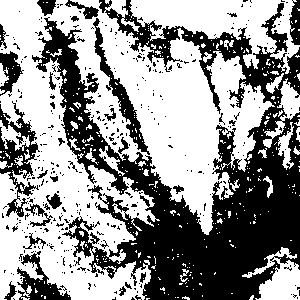

In [33]:
mask_crop

In [ ]:
# website example

# def crop(infile,height,width):
#     im = Image.open(infile)
#     imgwidth, imgheight = im.size
#     for i in range(imgheight//height):
#         for j in range(imgwidth//width):
#             box = (j*width, i*height, (j+1)*width, (i+1)*height)
#             yield im.crop(box)

# if __name__=='__main__':
#     infile=...
#     height=...
#     width=...
#     start_num=...
#     for k,piece in enumerate(crop(infile,height,width),start_num):
#         img=Image.new('RGB', (height,width), 255)
#         img.paste(piece)
#         path=os.path.join('/tmp',"IMG-%s.png" % k)
#         img.save(path)

In [ ]:
# def crop(path, input, height, width, k, page, area):
#     im = Image.open(input)
#     imgwidth, imgheight = im.size
#     for i in range(0,imgheight,height):
#         for j in range(0,imgwidth,width):
#             box = (j, i, j+width, i+height)
#             a = im.crop(box)
#             try:
#                 o = a.crop(area)
#                 o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
#             except:
#                 pass
#             k +=1